In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers



In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv
User uploaded file "CarPrice_Assignment.csv" with length 26717 bytes


In [3]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
data.head()

car_ID  symboling                   CarName  ... citympg highwaympg    price
0       1          3        alfa-romero giulia  ...      21         27  13495.0
1       2          3       alfa-romero stelvio  ...      21         27  16500.0
2       3          1  alfa-romero Quadrifoglio  ...      19         26  16500.0
3       4          2               audi 100 ls  ...      24         30  13950.0
4       5          2                audi 100ls  ...      18         22  17450.0

[5 rows x 26 columns]

In [5]:
print(data.shape)

(205, 26)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['fueltype'] = labelencoder.fit_transform(data['fueltype'])
data['aspiration'] = labelencoder.fit_transform(data['aspiration'])
data['carbody'] = labelencoder.fit_transform(data['carbody'])
data['drivewheel'] = labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem'] = labelencoder.fit_transform(data['enginelocation'])
data['doornumber'] = labelencoder.fit_transform(data['doornumber'])

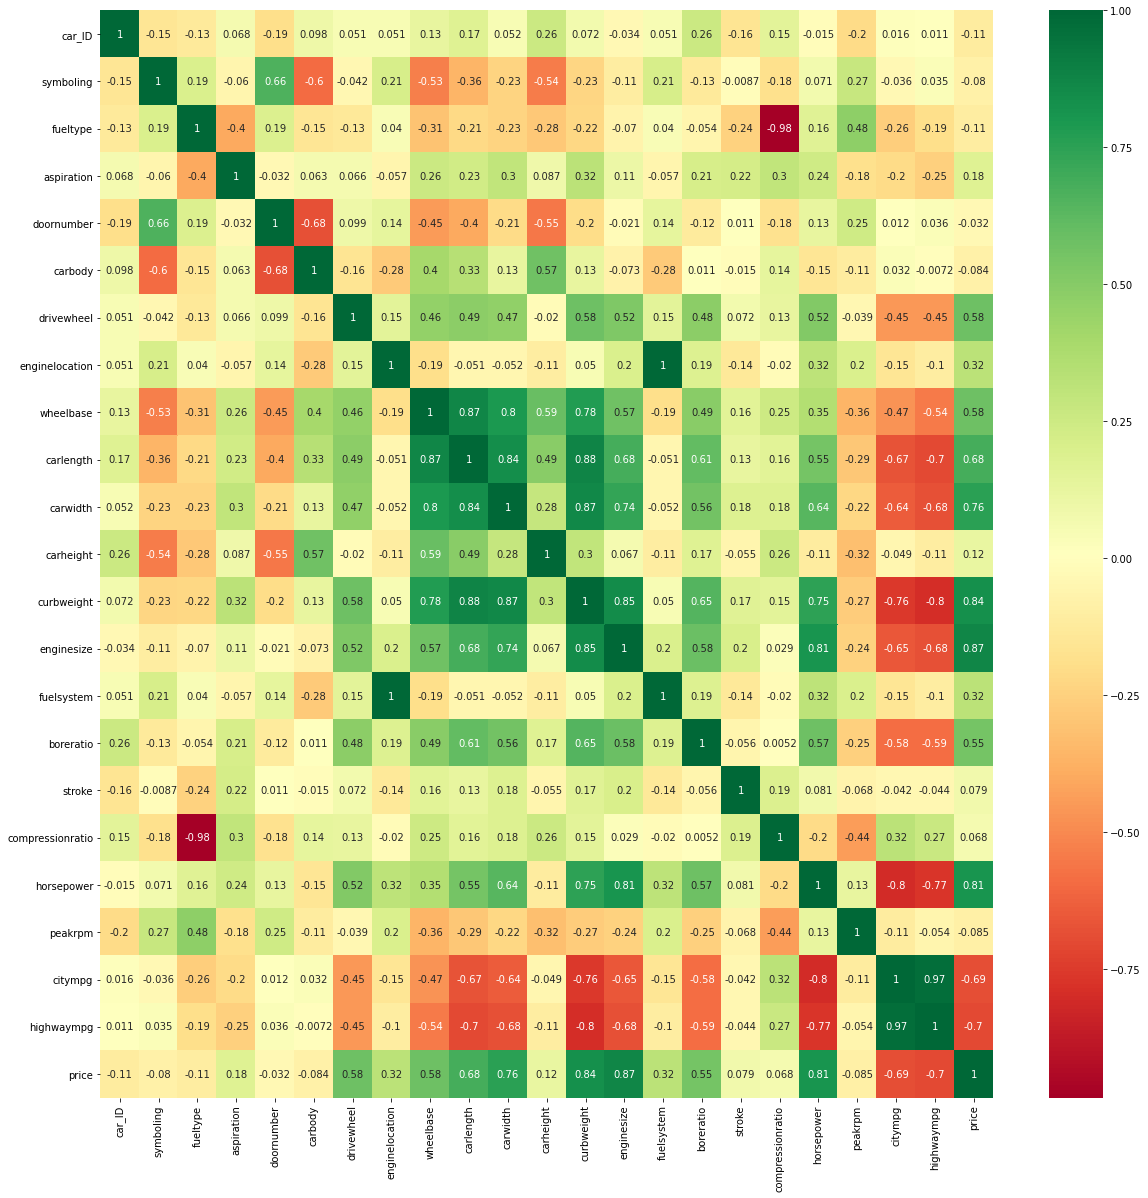

In [9]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
data1 = data[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength',
              'wheelbase','drivewheel','price','enginelocation']]

In [12]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [14]:
x = (data1.loc[:, data1.columns != 'price'])
y = (data1.loc[:, data1.columns == 'price'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [15]:
print(x_train)

     horsepower  boreratio  enginesize  ...  wheelbase  drivewheel  enginelocation
177          92       3.31         122  ...      102.4           1               0
75          175       3.78         140  ...      102.7           2               0
174          73       3.27         110  ...      102.4           1               0
31           76       2.91          92  ...       86.6           1               0
12          121       3.31         164  ...      101.2           2               0
..          ...        ...         ...  ...        ...         ...             ...
106         160       3.43         181  ...       99.2           2               0
14          121       3.31         164  ...      103.5           2               0
92           69       3.15          97  ...       94.5           1               0
179         161       3.27         171  ...      102.9           2               0
102         152       3.43         181  ...      100.4           1               0

[14

In [16]:
mean = x_train.iloc[: , 0:14].mean(axis=0)
x_train.iloc[: , 0:14] -= mean
std = x_train.iloc[:, 0:14].std(axis=0)
x_train.iloc[: , 0:14] /= std 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [17]:
x_train

horsepower  boreratio  enginesize  ...  wheelbase  drivewheel  enginelocation
177   -0.339563  -0.038773   -0.121004  ...   0.571301   -0.638990       -0.118681
75     1.717747   1.687015    0.313395  ...   0.620694    1.188522       -0.118681
174   -0.810513  -0.185649   -0.410604  ...   0.571301   -0.638990       -0.118681
31    -0.736153  -1.507529   -0.845003  ...  -2.030063   -0.638990       -0.118681
12     0.379256  -0.038773    0.892594  ...   0.373729    1.188522       -0.118681
..          ...        ...         ...  ...        ...         ...             ...
106    1.345944   0.401854    1.302861  ...   0.044442    1.188522       -0.118681
14     0.379256  -0.038773    0.892594  ...   0.752408    1.188522       -0.118681
92    -0.909661  -0.626276   -0.724336  ...  -0.729381   -0.638990       -0.118681
179    1.370731  -0.185649    1.061528  ...   0.653622    1.188522       -0.118681
102    1.147649   0.401854    1.302861  ...   0.242014   -0.638990       -0.118681

[143 rows x 9 columns]

In [18]:
val_mean = x_train.iloc[:, 0:14].mean(axis=0)
val_std = x_train.iloc[:, 0:14].std(axis=0)
x_train.iloc[:, 0:14] -= val_mean
x_train.iloc[:, 0:14] /= val_std

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [19]:
x_train = np.asarray(data1).astype('float32')
y_train = np.asarray(data1).astype('float32')

In [28]:
def build_model():
    model = Sequential()
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(1,))
    return model

In [29]:
model=build_model()

In [30]:

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [31]:
model.fit(x_train, y_train,epochs=500) 

Epoch 1/500
7/7 [==============================] - 0s 2ms/step - loss: 67025628.5000 - mae: 6052.4299
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 50285144.5000 - mae: 4686.7436
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 36707282.5000 - mae: 3604.6201
Epoch 4/500
7/7 [==============================] - 0s 2ms/step - loss: 34001887.0000 - mae: 2880.4242
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 26451912.5000 - mae: 1990.0642
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 22955310.7500 - mae: 1692.0205
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 22386886.2500 - mae: 2040.8881
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 21509550.5000 - mae: 2254.0899
Epoch 9/500
7/7 [==============================] - 0s 2ms/step - loss: 19916334.0000 - mae: 2370.1577
Epoch 10/500
7/7 [==============================] - 0s 2ms/step - loss: 20176377.5

In [32]:
y_pred = model.predict(x_test)

ValueError: ignored

In [33]:
model.evaluate(x_test, y_test)

ValueError: ignored